# Functional API Intro

## Imports

In [1]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
from tensorflow.python.keras.utils.vis_utils import plot_model
import pydot
from tensorflow.keras.models import Model

## Sequential API

Here is how we use the `Sequential()` class to build a model.

In [2]:
def build_model_with_sequential():
    
    # instantiate a Sequential class and linearly stack the layers of your model
    seq_model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28)),
                                            tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                            tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
    return seq_model

## Functional API

And here is how you build the same model above with the functional syntax.

In [3]:
def build_model_with_functional():
    
    # instantiate the input Tensor
    input_layer = tf.keras.Input(shape=(28, 28))
    
    # stack the layers using the syntax: new_layer()(previous_layer)
    flatten_layer = tf.keras.layers.Flatten()(input_layer)
    first_dense = tf.keras.layers.Dense(128, activation=tf.nn.relu)(flatten_layer)
    output_layer = tf.keras.layers.Dense(10, activation=tf.nn.softmax)(first_dense)
    
    # declare inputs and outputs
    func_model = Model(inputs=input_layer, outputs=output_layer)
    
    return func_model

## Build the model and visualize the model graph

You can choose how to build your model below. Just uncomment which function you'd like to use. You'll notice that the plot will look the same.

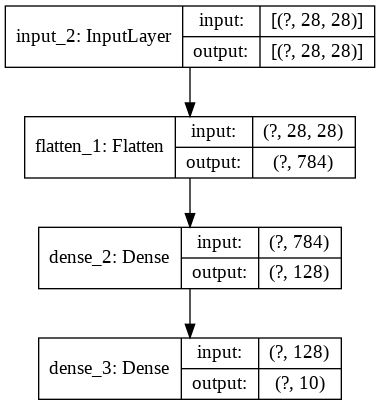

In [5]:
model1 = build_model_with_functional()
#model = build_model_with_sequential()

# Plot model graph
plot_model(model1, show_shapes=True, show_layer_names=True, to_file='model.png')

### Model2 --recalling with Input once again

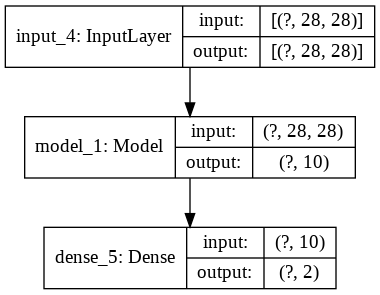

In [7]:
input_layer = tf.keras.Input(shape=(28, 28))
x = model1(input_layer)
output = tf.keras.layers.Dense(2, activation=tf.nn.softmax)(x)
model2 = Model(inputs=input_layer, outputs=output)
plot_model(model2, show_shapes=True, show_layer_names=True, to_file='model.png')

### Model3 -- with model1.input instead of Input

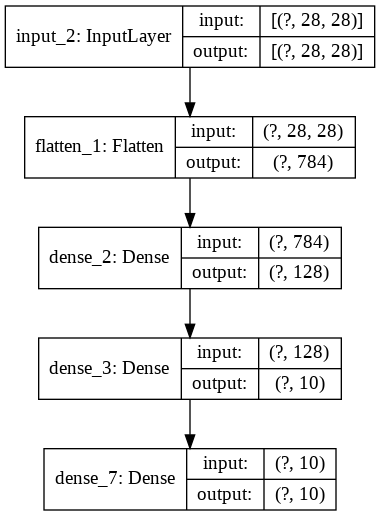

In [16]:
input_layer2 = model1.input
x2 = model1.output
output2 = tf.keras.layers.Dense(10, activation=tf.nn.softmax)(x2)

model3 = Model(inputs=input_layer2, outputs=output2)
plot_model(model3, show_shapes=True, show_layer_names=True, to_file='model.png')

## Training the model

Regardless if you built it with the Sequential or Functional API, you'll follow the same steps when training and evaluating your model.

In [17]:
# prepare fashion mnist dataset
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images = training_images / 255.0
test_images = test_images / 255.0

# configure, train, and evaluate the model
model3.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model3.fit(training_images, training_labels, epochs=10)
model3.evaluate(test_images, test_labels)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 86us/sample - loss: 1.6351 - accuracy: 0.3661
Epoch 2/10
60000/60000 [==============================] - 5s 82us/sample - loss: 1.2416 - accuracy: 0.4069
Epoch 3/10
60000/60000 [==============================] - 5s 83us/sample - loss: 1.1581 - accuracy: 0.4672
Epoch 4/10
60000/60000 [==============================] - 5s 82us/sample - loss: 1.0053 - accuracy: 0.5988
Epoch 5/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.8478 - accuracy: 0.6784
Epoch 6/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.6858 - accuracy: 0.7753
Epoch 7/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.5855 - accuracy: 0.8260
Epoch 8/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.5252 - accuracy: 0.8458
Epoch 9/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.4799 - accuracy: 0.8686
Epoch 10/10
10

[0.4904317318916321, 0.8566]